# Practical Work 9

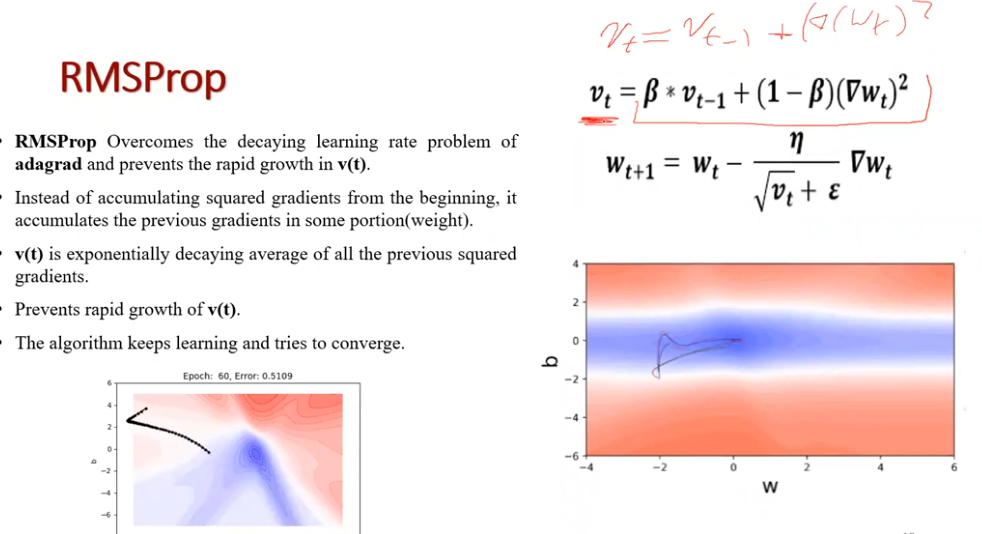

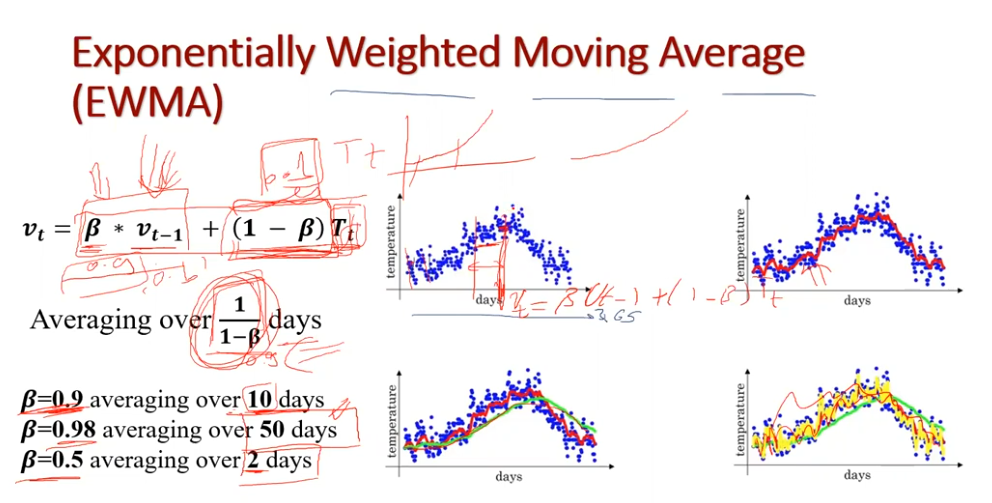

- For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Multivariables) of a set of datapoints.
- We will do a vectorize implementation (Using Matrix vectors operations) which is the more general and effecient form of GD implementation.
- As we did with the single variable we will do step by step implementation then combine all steps togeteher then make a function for the Multivariables LR training using GD.

### Prerequisites:
- You should have seen <b>Day 1 and Day 2 as well as Day 3 Part 1</b> from our course <b><i>Master Numerical Optimization for Machine Learning and Deep Learning in 5 Days</b></i>.
- The course is available for free on our channel <b><i>Artificial Intelligence & Data Science شرح بالعربي</i></b>.
- Course link https://youtube.com/playlist?list=PLJM7jJIw2GC15hvIwN8sBXok__yLMcMxN&feature=shared

### Whatsapp Channel: 
https://whatsapp.com/channel/0029Va0cflnId7nVMfzByO3k

### Import numpy, matplotlib.pyplot

In [100]:
def plot_loss(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.show()
    
def plot_theta_loss(Th,Th_0_1,Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    

In [2]:
import numpy as np ,matplotlib.pyplot as plt,seaborn as sns ,plotly.express as px

### Read MultiVarLR.csv file into numpy array 

In [3]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [4]:
m=len(data)

In [5]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

### Define variables X and y. 
### Assign all columns data except the last one to X and last column to y
<b>Notes:</b> 
- We have here 3 independent variables and one dependent variable.
- Make sure <b>y</b> is a column vector to obtain correct matrix vector operations.

In [6]:
X=data[:,0:3]
print(X)
print(X.shape)


[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
(25, 3)


In [7]:
Y=data[:,3].reshape((-1,1))
Y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [107]:
Y.shape
Y=Y.reshape(-1,1)
Y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Add column of ones to the X data matrix to be X0 variable for theta0 parameters.
- The model has X1,X2, and X3 variables and theta0, theta1, theta3, and theta4 parameters. So, we need X0 for theta0 to have consistent <b>X matrix</b> dimensions.

In [8]:
ones_col= np.ones(  (m, 1))
x=data[:,0:3]
x_new= np.hstack(   (      ones_col , x     )   ) #or

x=data[:,0:3]
x_new=np.concatenate( (ones_col,x) ,axis=1 )   #25*4

x_new

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

### Step 1: Initialize model parameters as 4 by 1 column vector of zeros.

In [18]:
n_1=data.shape[1]
Th=np.zeros((n_1,1))
Th

array([[0.],
       [0.],
       [0.],
       [0.]])

### Step 2: Calculate model outpt y for all data points using matrix vector multiplication.
###  $$h(x) = X\theta$$

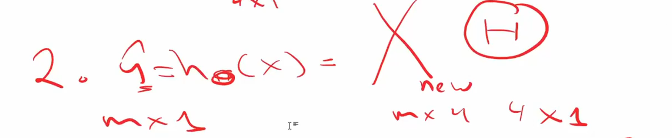

In [11]:
H=x_new@Th    #  25*4   @ 4*1 ==>    25*1
H

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Step 3: Calculate the MSE Cost function.
- You should calculate the error vector first <b>e = h - y</b> then use it for cost function calculation.
- We will also need this error vector in gradient vector calculation.

In [12]:
E=H-Y    #  25*1 -   25*1  ==>25*1 
print(H.shape,Y.shape)
E.shape

(25, 1) (25, 1)


(25, 1)

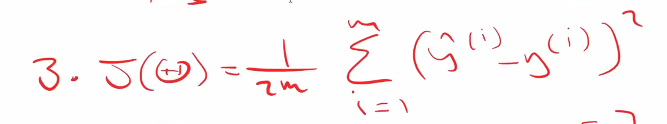

In [13]:
j=np.linalg.norm(E)**2/(2*m)
j

13405.98

### Step 4: Calculate the gradient vector
- In this step we will not calculate each gradient component for each parameter individually.
- We will use the error vector and calculate the gradient vector by multiplying the data matrix transpose with the error vector .
###  $$\nabla =\frac{X^Te}{m}$$

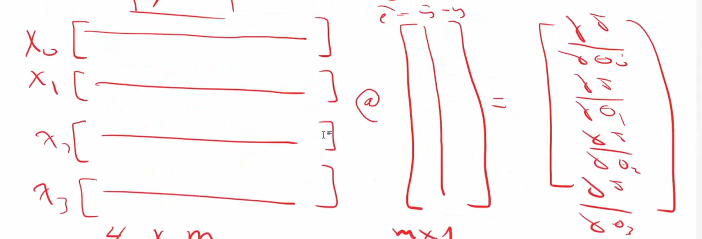

In [14]:
grad=(x_new.T @E )/m    #  4*25 @  25*1 ==>4*1
grad

array([[  -162.04],
       [-13075.8 ],
       [-13147.2 ],
       [-13467.08]])

### Step 5: Check if gradient norm < critical value (stop condition) e.g. 0.1

In [19]:

grad_norm=np.linalg.norm(grad)
print(grad_norm)

22917.545989219703


### Step6: Update the parameters (use 0.00001 learning rate)

In [16]:
e=.000000001
alpha=0.00001
v_prev=np.zeros((4,1))


In [21]:
print(Th)
print(grad)
peta=.9
v_cur= peta *v_prev +(1-peta)*(grad**2)
Th=Th-(  (alpha/(np.sqrt(v_cur)+e))*grad)
Th

[[1.05409255e-05]
 [1.05409255e-05]
 [1.05409255e-05]
 [1.05409255e-05]]
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]


array([[4.21637021e-05],
       [4.21637021e-05],
       [4.21637021e-05],
       [4.21637021e-05]])

### Step 7: Combine all the previous steps and iterate untill you reach the critical value of the gradient norm or cost convergence check .
- learning rate = 0.00001.
- Maximum number of iterations = 10000.
- Stop condition grad_norm < 0.1.
- Cost convergence check <b>abs(cost[i] - cost[i-1]) < 0.001 </b>

### In order to plot the learning curves you need to save thetas and cost each iteration.

In [24]:

m=x_new.shape[0] 
n_1=x_new.shape[1]
aplha=0.001
peta=.5
E=0.000000001
max_iter=1500
v_prev=np.zeros((n_1,1))
grad_check=0.1
conv_check=0.001
th=np.zeros((n_1,1))
loss=[]
theats_arr=[]
for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=x_new@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)  
    print(f"J = \n{j}")
    loss.append(j)
    grad=(x_new.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  np.absolute(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    v_prev=peta*v_prev +(1-peta)*(grad**2)
    th=th - (aplha/(np.sqrt(v_prev)+E)) *grad
    print(f"new_theats = \n{th}")
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.00141421]
 [0.00141421]
 [0.00141421]
 [0.00141421]]
****************** Iteration  1 ******************** 

 h(x) = 
[[0.32385491]
 [0.38890873]
 [0.38325188]
 [0.417193  ]
 [0.29698485]
 [0.2192031 ]
 [0.3125412 ]
 [0.23193102]
 [0.36345289]
 [0.33658283]
 [0.30122749]
 [0.29698485]
 [0.3959798 ]
 [0.32951176]
 [0.31395541]
 [0.39456558]
 [0.31395541]
 [0.37476659]
 [0.37759502]
 [0.33799704]
 [0.36628131]
 [0.3648671 ]
 [

### Predict y values using the LR equation 
- Now we will use the obtained obtimum parameters <b>thetas</b> to make predition using the equation: 
###  $$h(x) = X\theta$$

In [25]:
h=x_new@th
h

array([[153.2089761 ],
       [185.06541489],
       [181.76653214],
       [198.71016811],
       [140.84892387],
       [105.30589505],
       [149.75248423],
       [112.3580765 ],
       [174.19194966],
       [163.22297694],
       [143.7830147 ],
       [142.53171958],
       [186.97889543],
       [154.44361982],
       [150.67817369],
       [188.45402475],
       [146.45996854],
       [179.89213477],
       [177.99647897],
       [159.34702885],
       [175.39260084],
       [174.35475249],
       [166.93199875],
       [152.61467268],
       [191.24833119]])

### Use R Squared metrics to evaluate LR equation output
- Can be found in <b>sklearn.metrics</b>

https://www.youtube.com/watch?v=KccCy0hu-dM

In [26]:
from sklearn.metrics import r2_score

In [28]:
r2_score(Y,h) 

0.9871660609220202

### Plot loss vs. iterations

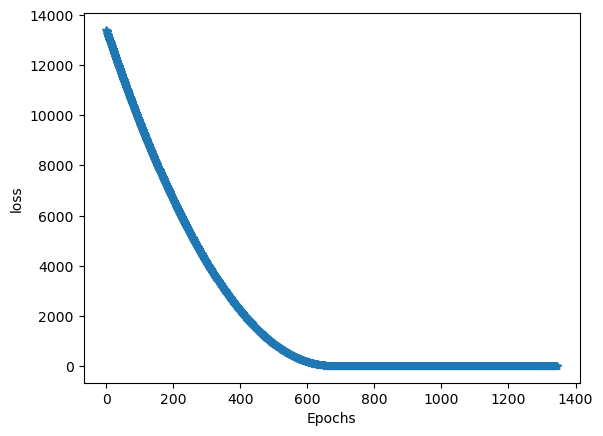

In [29]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()



### Plot loss vs. each theta

In [30]:
array=np.array(theats_arr)
print (array.shape)                                  ##########important 
array=array.reshape((len(theats_arr),n_1))
print (array.shape)                                  
print (array)


(1346, 4, 1)
(1346, 4)
[[0.         0.         0.         0.        ]
 [0.00141421 0.00141421 0.00141421 0.00141421]
 [0.0025681  0.0025681  0.0025681  0.0025681 ]
 ...
 [0.4684976  0.5221122  0.5444033  0.94766882]
 [0.46729562 0.52099513 0.54333371 0.94696564]
 [0.46774282 0.52181437 0.54424615 0.94812124]]


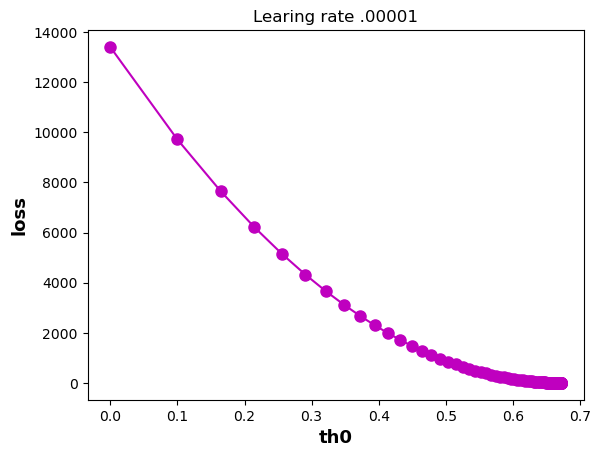

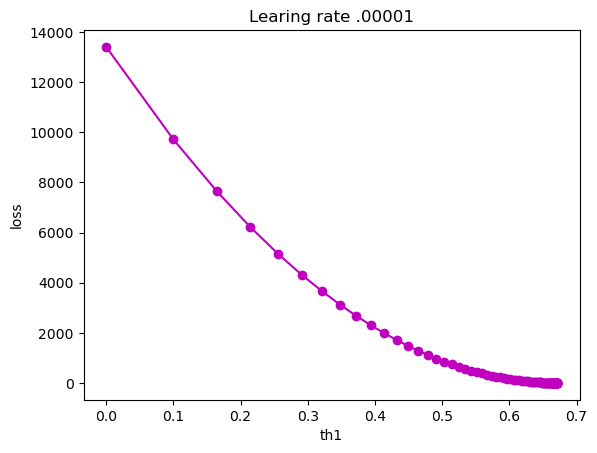

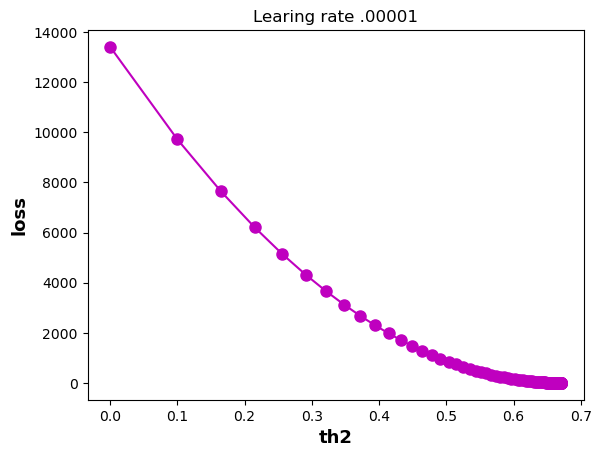

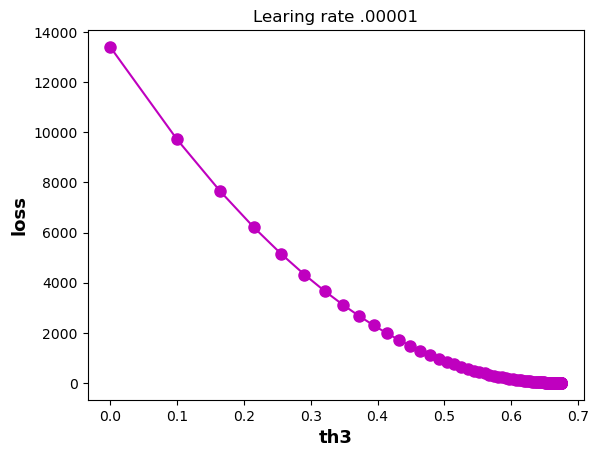

In [134]:
plt.figure()
plt.plot(array[:,0],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th0',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')
plt.figure()
plt.plot(array[:,1],loss,'mo-',)
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th2',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')
plt.figure()
plt.plot(array[:,3],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th3',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')

plt.show()

- Use <b>learning rate = 0.0001</b> and see the difference in learning curves and <b>r2_score</b>.
- You can also try larger learning rate i.e. <b>0.001</b> and see how the optimizer diverges and <b>r2_score</b>.

In [37]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

y=data[:,3].reshape(-1,1)
x=data[:,0:3]
x_new= np.hstack(                 (   np.ones(     (x.shape[0], 1)   )  , x     )   )

m=x_new.shape[0] 
n_1=x_new.shape[1]
peta=.1
aplha=0.01
E=0.000000001
max_iter=1000
v_prev=np.zeros((n_1,1))
grad_check=0.1
conv_check=0.001
th=np.zeros((n_1,1))
loss=[]
theats_arr=[]
for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=x_new@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}") 
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)  
    print(f"J = \n{j}")
    loss.append(j)
    grad=(x_new.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  np.absolute(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    v_prev= peta*v_prev +(1-peta)*(grad**2)
    th=th - (aplha/(np.sqrt(v_prev)+E)) *grad
    print(f"new_theats = \n{th}")
    

    
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.01054093]
 [0.01054093]
 [0.01054093]
 [0.01054093]]
****************** Iteration  1 ******************** 

 h(x) = 
[[2.41387195]
 [2.89875452]
 [2.85659082]
 [3.10957303]
 [2.21359436]
 [1.63384346]
 [2.32954454]
 [1.72871179]
 [2.70901786]
 [2.50874028]
 [2.24521714]
 [2.21359436]
 [2.95145915]
 [2.45603565]
 [2.34008547]
 [2.94091822]
 [2.34008547]
 [2.79334527]
 [2.81442712]
 [2.5192812 ]
 [2.73009971]
 [2.71955879]
 [

In [38]:
h=x_new@theats_arr[-1]
h

array([[155.13112427],
       [186.30816577],
       [183.58961299],
       [199.85811295],
       [142.26736101],
       [105.02318017],
       [149.73397505],
       [111.12807556],
       [174.12860616],
       [161.27773625],
       [144.30839878],
       [142.28623903],
       [189.67717056],
       [157.82569446],
       [150.41483438],
       [189.02583843],
       [150.36774933],
       [179.54797772],
       [180.86683576],
       [161.89954117],
       [175.47901555],
       [174.79925637],
       [167.34465555],
       [156.46375578],
       [193.07614261]])

In [159]:
r2_score(Y,h)

0.9873276637140213

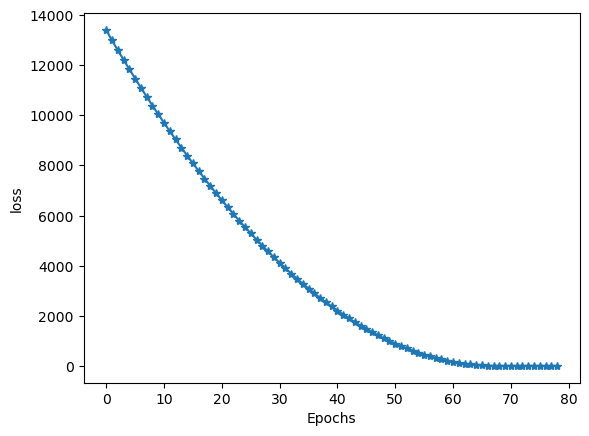

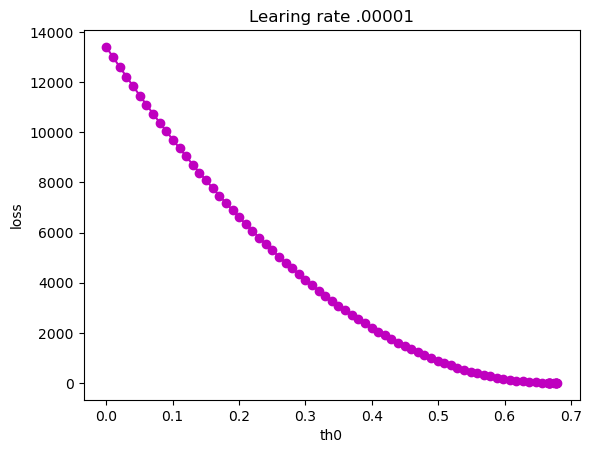

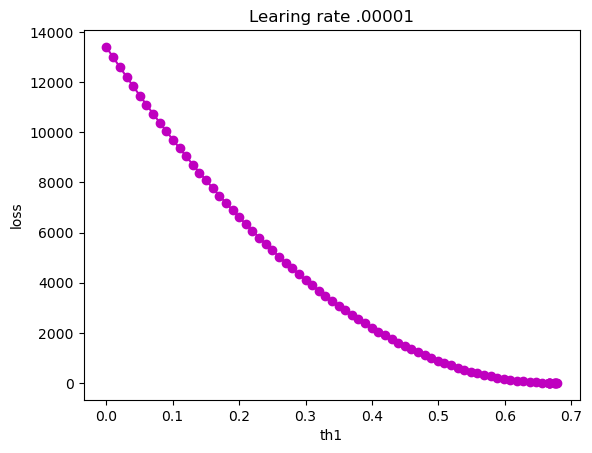

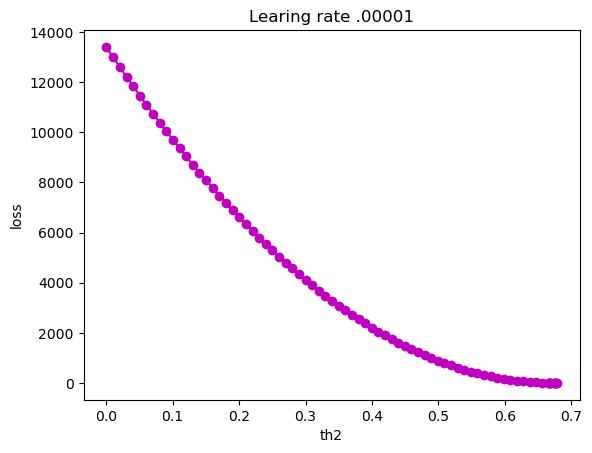

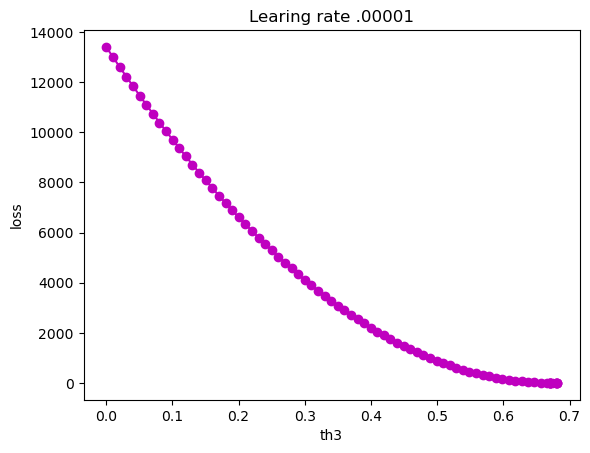

In [39]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

array=np.array(theats_arr)
plt.figure()
plt.plot(array[:,0],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th0')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,1],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th2')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,3],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th3')
plt.ylabel('loss')

plt.show()

## Optional Part: Make all as funtions:
### You can modify the implementation to be a function taking all hyperparameters and return all needed outputs.
### You can also make your plotting using functions taking the outputs and return the learning curves.
### This will make your life easy when you want to try different values of hyperparametrs.

#### Use your previous code and create a function to perform GD for Muli-variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations, stop conditions values.
#### The function should return the following:
##### All Theta values till converge, and equivellant Losses.

In [43]:

    
def DG_momuntal_Muli_variable_linear_regression(X,Y,alpha=.1,peta=.1,max_iter=1000,grad_check=.001,conv_check=.001):
    
    m=X.shape[0]
    onesArray=   np.ones(  (m, 1)   )
    X= np.hstack(  ( np.ones(  (m, 1)   )  , X    )  )
    n_1=X.shape[1]
    th=np.zeros((n_1,1))
    v_prev=np.zeros((n_1,1))
    loss=[]
    theats_arr=[]
    e=.000000001
    for i in range(max_iter):
        print(f"****************** Iteration  {i} ******************** \n")
        theats_arr.append(th)
        h=X@th                                  #  25*4   @ 4*1   ==>    25*1
        e=h-Y                                   #  25*1 -   25*1  ==>25*1 
        print(f"Erorr = \n{e}")
        j=np.linalg.norm(e)**2/(2*m)
        print(f"J = \n{j}")
        loss.append(j)
        grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
        print(f"grad = {grad}")
        grad_norm=np.linalg.norm(grad)
        print(f"grad_norm = \n{grad_norm}")
        if grad_norm<grad_check:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i+1} epochs \n ")
            print(f"theta_Opt :\n{th}\n")
            print(f"Error Vector: :\n{e}\n")
            print(f"Cost  :\n{j}\n")
            print(f" y_predict:\n{h}\n")
            print(f" y_actual:\n{Y}\n")
            break 
        if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i+1} epochs \n ")
            print(f"theta_Opt :\n{th}\n")
            print(f"Error Vector: :\n{e}\n")
            print(f"Cost  :\n{j}\n")
            print(f" y_predict:\n{h}\n")
            print(f" y_actual:\n{Y}\n")
            break
        v_prev=peta*v_prev+ (1-peta)*(grad**2)
        th=th-((alpha/(np.sqrt(v_prev)+E))*grad)
        print(f"new_theats = \n{th}")
    return theats_arr,loss
        
T,loss=DG_momuntal_Muli_variable_linear_regression(x,Y,.001,.1,1000,.01,.001)
    

****************** Iteration  0 ******************** 

Erorr = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.00105409]
 [0.00105409]
 [0.00105409]
 [0.00105409]]
****************** Iteration  1 ******************** 

Erorr = 
[[-151.75861281]
 [-184.71012455]
 [-179.71434092]
 [-195.6890427 ]
 [-141.77864056]
 [-100.83661565]
 [-148.76704555]
 [-114.82712882]
 [-174.72909821]
 [-163.74912597]
 [-140.77547829]
 [-140.77864056]
 [-183.70485409]
 [-151.75439644]
 [-147.76599145]
 [-191.70590818]
 [-146.76599145]
 [-182.72066547]
 [-176.71855729]
 [-158.74807188]
 [-176.72699003]
 [-174.72804412]
 [-174.73963914]
 [-148.75650462]
 [-191.69958362]]
J = 
13364.005099937891
grad = [[  -161.785

In [45]:
def calc_r2(Y,t):
    h=x_new@t[-1]
    return r2_score(Y,h)

t=np.array(T)
#print(X)
t=t.reshape((-1,4))
x=calc_r2(Y,t)
print(x)


0.9782935711092854


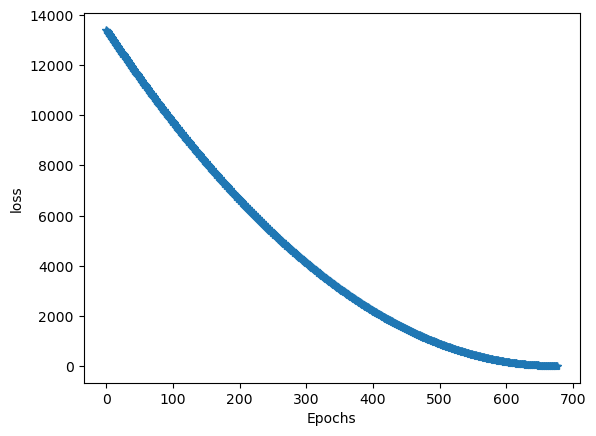

In [46]:
def plot_loss(loss):
    plt.figure()
    plt.plot(loss,'*-')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.show()

plot_loss(loss)
    

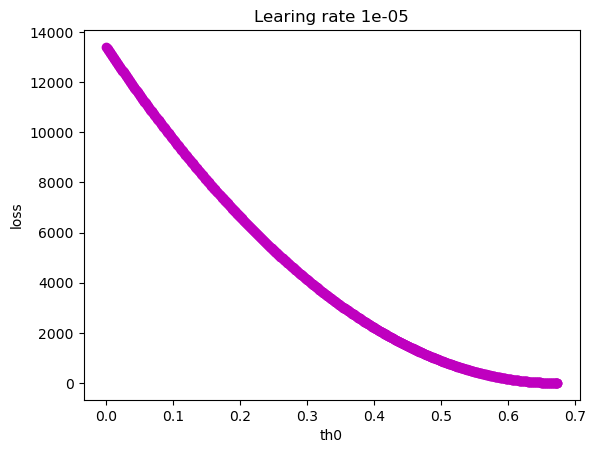

In [47]:
def plot_theta_loss(theats_arr,loss,alpha,theata):
    array=np.array(theats_arr)
    plt.figure()
    plt.plot(array[:,theata],loss,'mo-')
    plt.title(f"Learing rate {alpha}")
    plt.xlabel(f"th{theata}")
    plt.ylabel('loss')
    plt.show()
    
plot_theta_loss(T,loss,0.00001,0)

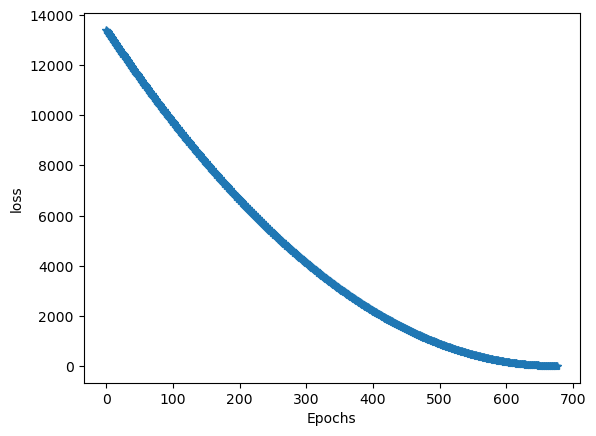

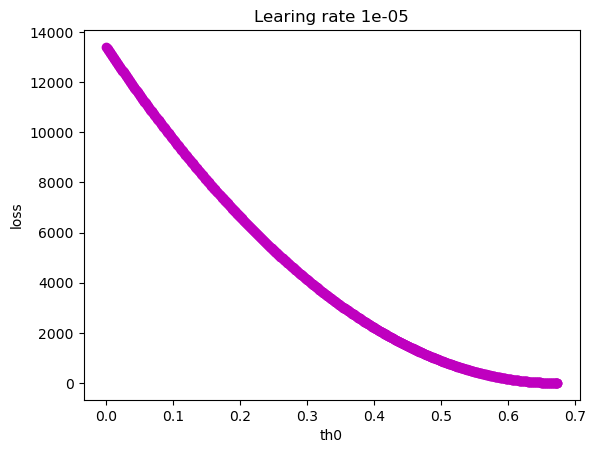

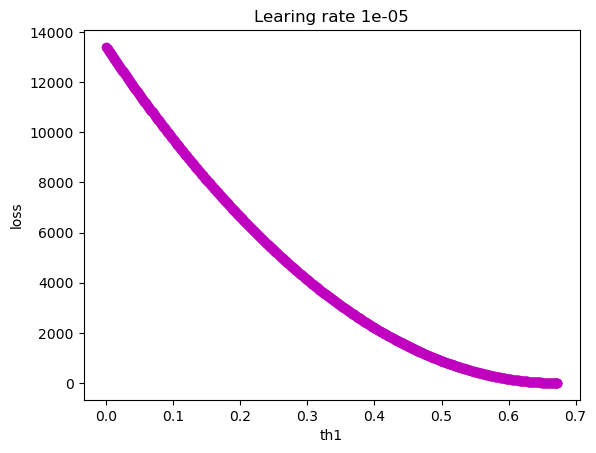

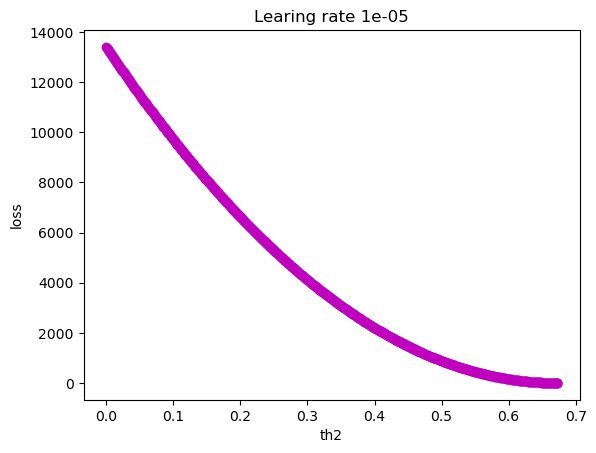

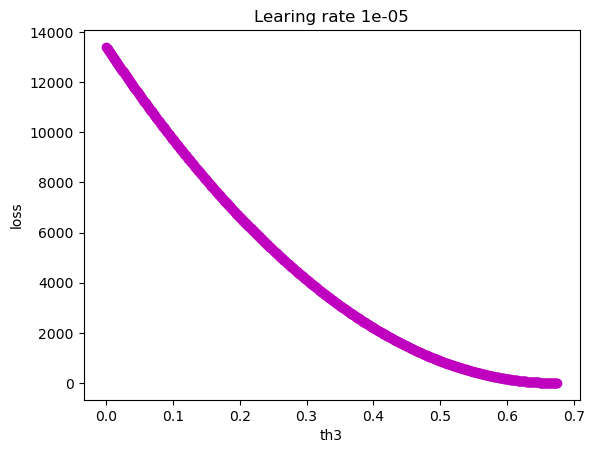

In [49]:
plot_loss(loss,)
ths_arr = np.array(T).reshape((-1,4))
plot_theta_loss(T,loss,0.00001,0)
plot_theta_loss(T,loss,0.00001,1)
plot_theta_loss(T,loss,0.00001,2)
plot_theta_loss(T,loss,0.00001,3)

